In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sn
%matplotlib inline
sn.set()
import warnings
warnings.filterwarnings('ignore')


In [ ]:
'''data1 = pd.read_csv('/content/drive/MyDrive/test data/benign_traffic1.csv')
data2 = pd.read_csv('/content/drive/MyDrive/test data/ack1.csv')
data3 = pd.read_csv('/content/drive/MyDrive/test data/junk1.csv')
data4 = pd.read_csv('/content/drive/MyDrive/test data/scan1.csv')
data5 = pd.read_csv('/content/drive/MyDrive/test data/syn1.csv')
data6 = pd.read_csv('/content/drive/MyDrive/test data/tcp1.csv')
data7 = pd.read_csv('/content/drive/MyDrive/test data/udp1.csv')
data8 = pd.read_csv('/content/drive/MyDrive/test data/udpplain1.csv')'''
data1=pd.read_csv('/content/drive/MyDrive/280k_data/ack_h.csv')
data2=pd.read_csv('/content/drive/MyDrive/280k_data/benign_traffic_h.csv')
data3=pd.read_csv('/content/drive/MyDrive/280k_data/junk_h.csv')
data4=pd.read_csv('/content/drive/MyDrive/280k_data/scan_h.csv')
data5=pd.read_csv('/content/drive/MyDrive/280k_data/syn_h.csv')
data6=pd.read_csv('/content/drive/MyDrive/280k_data/tcp_h.csv')
data7=pd.read_csv('/content/drive/MyDrive/280k_data/udp_h.csv')
data8=pd.read_csv('/content/drive/MyDrive/280k_data/udpplain_h.csv')

datas=pd.concat([data1,data2,data3,data4,data5,data6,data7,data8], axis=0, sort=False, ignore_index=True)
datas

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,566.000000,0.000000e+00,1.000000,566.000000,0.000000e+00,1.000000,566.000000,0.000000e+00,1.000000,...,0.000000e+00,0.0,0.0,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0
1,1.996585,566.000000,5.820000e-11,1.997950,566.000000,5.820000e-11,1.999316,566.000000,0.000000e+00,1.999932,...,0.000000e+00,0.0,0.0,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0
2,2.958989,566.000000,0.000000e+00,2.975291,566.000000,5.820000e-11,2.991729,566.000000,5.820000e-11,2.999171,...,0.000000e+00,0.0,0.0,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0
3,3.958979,566.000000,0.000000e+00,3.975285,566.000000,0.000000e+00,3.991727,566.000000,1.160000e-10,3.999171,...,0.000000e+00,0.0,0.0,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0
4,4.914189,566.000000,1.160000e-10,4.948239,566.000000,5.820000e-11,4.982654,566.000000,5.820000e-11,4.998261,...,0.000000e+00,0.0,0.0,1.000000,566.0,0.000000,566.0,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279987,39.256165,504.003978,2.219839e+04,66.495961,426.545257,4.671683e+04,259.096457,328.198231,6.054598e+04,2788.201337,...,5.240000e-10,0.0,0.0,3132.118867,554.0,0.000037,554.0,1.400000e-09,0.0,0.0
279988,40.255905,505.245933,2.170751e+04,67.495697,428.433595,4.626179e+04,260.096115,329.066378,6.050847e+04,2789.200968,...,4.660000e-10,0.0,0.0,3133.118826,554.0,0.000037,554.0,1.400000e-09,0.0,0.0
279989,41.255606,506.427690,2.123756e+04,68.495396,430.266805,4.581322e+04,261.095728,329.927877,6.046976e+04,2790.200553,...,5.240000e-10,0.0,0.0,3134.118779,554.0,0.000037,554.0,1.400000e-09,0.0,0.0
279990,42.255469,507.553516,2.078725e+04,69.495260,432.047260,4.537113e+04,262.095555,330.782802,6.042988e+04,2791.200369,...,4.660000e-10,0.0,0.0,3135.118758,554.0,0.000039,554.0,1.510000e-09,0.0,0.0


In [ ]:
from sklearn.cluster import MeanShift 
from sklearn.cluster import estimate_bandwidth
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [ ]:
num_samples_total = 200000
cluster_centers = [[1,1,1],[10,10,20],[25,25,30],[50,100,100],[100,100,150],[200,200,210],[210,210,225],[250,250,300]] 

num_classes = len(cluster_centers)


In [ ]:
datas, targets = make_blobs(n_samples = num_samples_total,centers = cluster_centers ,
                              n_features = num_classes, center_box=(0, 1), cluster_std = 0.30)

In [ ]:
bandwidth = estimate_bandwidth(datas, quantile=0.2)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(datas)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

In [ ]:
clusters = print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 5


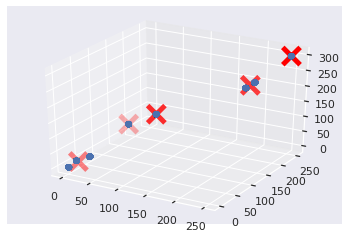

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(datas[:,0], datas[:,1], datas[:,2], marker='o')
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], 
 cluster_centers[:,2], marker='x', color='red', s=300, linewidth=5,
                                   zorder=10)
plt.show()

Adjusted Rand Index

In [ ]:
from sklearn import metrics

metrics.adjusted_rand_score(ms.labels_,targets)

0.5999915997815943

Fowlkes-Mallows score

In [ ]:
metrics.fowlkes_mallows_score(ms.labels_,targets) 

0.7070997099419544

Silhouetter Score

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

score = silhouette_score(datas, ms.labels_, metric='euclidean')

In [ ]:
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.909


Calinski_harabasz_score

In [ ]:
from sklearn import metrics
print(metrics.calinski_harabasz_score(datas,ms.labels_))

8914430.483112939
